# Summary

We consider the following problem:

$$
-u''(x) + cu(x) = f(x), \hspace{0.5cm} x\in (0,1), \hspace{0.5cm} c \equiv \mathrm{const.} \geq 0 \\
u(0) = u(1) = 0.
$$

Then, the corresponding weak formulation consists of finding $u\in H^1_0(0,1)$, such that

$$
\int_0^1 u'(x) v'(x) \mathrm{d}x + c \int_0^1 u(x) v(x) \mathrm{d}x = \int_0^1 f(x) v(x) \mathrm{d}x, 
\hspace{0.5cm} \forall v \in H^1_0(0,1).
$$

## Galerkin Discretization

We discretize $(0, 1)$ into $N-1$ intervals with same length $h$,
i.e. $N$ equidistant support points and consider the following basis functions.

$$
\phi_i(x) \equiv
\begin{cases}
    \frac{x-x_{i-1}}{h}, x \in [x_{i-1}, x_i]\\
    \frac{x_{i+1}-x}{h}, x \in [x_i, x_{i+1}]
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_stiffness_matrix(n: int, h: float) -> np.ndarray:
    """
    returns the stiffness matrix of the problem at hand
    
    n: int
        The dimension of the galerkin discretized space,
        i.e. the number of support points in Omega.
    h: float
        The equidistance between support points inn Omega.
    """
    # Define the values for the main diagonal, upper diagonal, and lower diagonal
    main_diagonal = np.full(n, 2.)
    off_diagonal = np.full(n-1, -1.)

    # Create the tridiagonal matrix
    matrix = 1./h * (np.diag(main_diagonal) 
                    + np.diag(off_diagonal, k=1)
                    + np.diag(off_diagonal, k=-1))

    return matrix


def get_mass_matrix(n: int, h: float) -> np.ndarray:
    """
    returns the mass matrix of the problem at hand
    
    n: int
        The dimension of the galerkin discretized space,
        i.e. the number of support points in Omega.
    h: float
        The equidistance between support points inn Omega.
    """
    # Define the values for the main diagonal, upper diagonal, and lower diagonal
    main_diagonal = np.full(n, 4.)
    off_diagonal = np.full(n-1, 1.)

    # Create the tridiagonal matrix
    matrix = h/6. * (np.diag(main_diagonal) 
                    + np.diag(off_diagonal, k=1)
                    + np.diag(off_diagonal, k=-1))

    return matrix


def compute_solution(n: int, f: object, c: float=1.) -> np.ndarray:

    omega = np.linspace(0., 1., n+2)
    h=(1. - 0.)/(n+1)
    support_points = omega[1:-1]

    stiffnes_matrix = get_stiffness_matrix(n=n, h=h)
    mass_matrix = get_mass_matrix(n=n, h=h)
    f_support = f(support_points)

    # Calculate (A + cC)^-1
    M = stiffnes_matrix + c * mass_matrix
    M_inverse = np.linalg.inv(M)

    # Calculate (A + cC)^-1 * C * F
    u_support = np.dot(np.dot(M_inverse, mass_matrix), f_support)

    # Adding zeros in front and back by hand (boundary conditions)
    u_solution = np.insert(u_support, [0, len(u_support)], [0, 0])

    return u_solution, omega


def run_error_analysis(dimensions: list[int], f: object, c:float, u_analytical: object) -> list[float]:
    errors = []
    for n in dimensions:

        u_solution, omega = compute_solution(n=n, f=f, c=c)
        u_exact = u_analytical(omega)

        error = max(u_solution-u_exact)
        errors.append(error)
    return errors

## Experiment 1

Consider $u(x) := x^2 - x$.

Text(0.5, 0, '$\\mathrm{dim}(V_h)$')

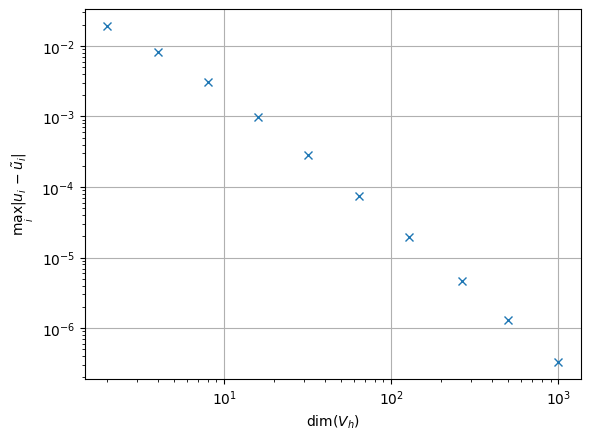

In [3]:
c=10.

u_analytical = lambda x : x**2-x
f = lambda x: -2 + c*(x**2. - x)

dimensions = [2, 4, 8, 16, 32, 64, 128, 264, 500, 1000]

fig, ax = plt.subplots()


errors = run_error_analysis(dimensions=dimensions, f=f, c=c, u_analytical=u_analytical)

ax.loglog(dimensions, errors, label=f'c={c}', marker='x', linestyle='')
ax.grid(True)

ax.set_ylabel(r"$\max_i |u_i - \tilde{u}_i|$")
ax.set_xlabel(r"$\mathrm{dim}(V_h)$")
# fig.savefig('error_analysis_x2-x.png')

## Experiment 2

Consider $u(x) := \sin (10 \pi x)$.

Text(0.5, 0, '$\\mathrm{dim}(V_h)$')

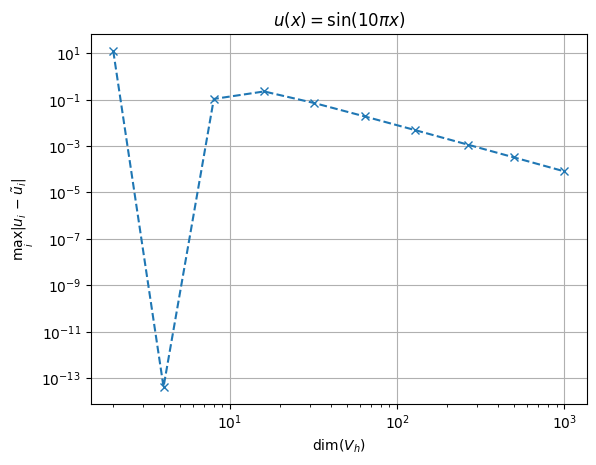

In [17]:
c=10.

u_analytical = lambda x : np.sin(10*np.pi*x)
f = lambda x: ((np.pi * 10)**2 + c)*np.sin(10*np.pi*x)

dimensions = [2, 4, 8, 16, 32, 64, 128, 264, 500, 1000]

fig, ax = plt.subplots()

errors = run_error_analysis(dimensions=dimensions, f=f, c=c, u_analytical=u_analytical)

ax.loglog(dimensions, errors, label=f'c={c}', marker='x', linestyle='--')

ax.set_title(r'$u(x) = \sin (10 \pi x)$')
ax.grid(True)
ax.set_ylabel(r"$\max_i |u_i - \tilde{u}_i|$")
ax.set_xlabel(r"$\mathrm{dim}(V_h)$")
# fig.savefig('error_analysis_sin(10pix).png')

**Note.**
The dip at the seconnd point appears as all support points lie at points where $u(x_i) = 0$.

## Experiment 3

Consider $u(x) \equiv \sin (100 \pi x)$.

Text(0.5, 0, '$\\mathrm{dim}(V_h)$')

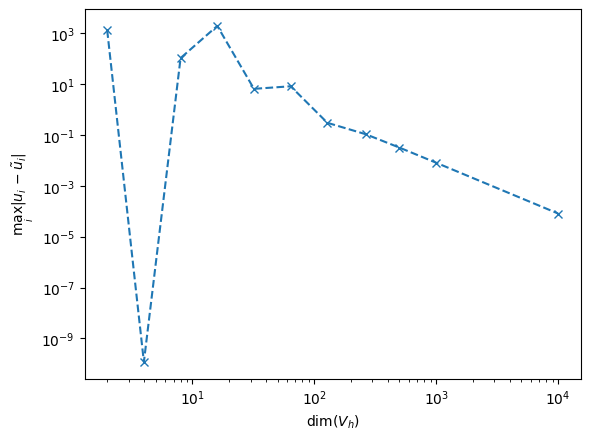

In [15]:
c=10.

k = 100
u_analytical = lambda x : np.sin(k*np.pi*x)
f = lambda x: ((np.pi * k)**2 + c)*np.sin(k*np.pi*x)

dimensions = [2, 4, 8, 16, 32, 64, 128, 264, 500, 1000, 10000]

fig, ax = plt.subplots()

errors = run_error_analysis(dimensions=dimensions, f=f, c=c, u_analytical=u_analytical)

ax.loglog(dimensions, errors, label=f'c={c}', marker='x', linestyle='--')

ax.set_ylabel(r"$\max_i |u_i - \tilde{u}_i|$")
ax.set_xlabel(r"$\mathrm{dim}(V_h)$")
# fig.savefig('error_analysis_sin(10pix).png')